Notre dataset, composé de **31 colonnes** et **9965 lignes**, est conçu pour la détection de fraude. \
Les principales colonnes sont :

**.** ⏱ Time : Temps écoulé, en secondes, depuis la première transaction du dataset.

**.** 🔐 V1 à V28 : Résultats d'une réduction dimensionnelle (PCA) pour protéger l'identité des utilisateurs et les données sensibles.

**.** 💸 Amount : Montant dépensé lors de la transaction.

**.** ⚖️ Class : Indique si la transaction est frauduleuse (1) ou non (0).

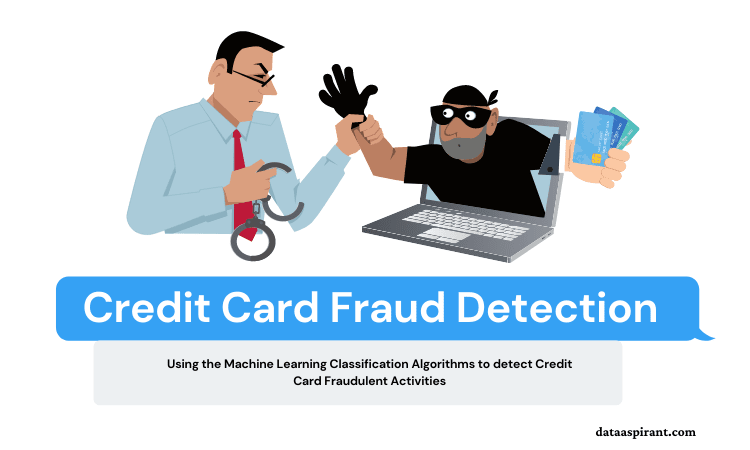

# Importing Necessary Libraries 📚

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

# 💻 Data Loading and EDA 🔍 (Exploratory Data Analysis):

In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

Le dataset contient 9965 lignes et 31 colonnes. La colonne ⏱ "Time" est de type entier (int64), tandis que les autres colonnes (V1 à V28, Amount et Class) sont de type flottant (float64).

 Il y a quelques valeurs manquantes dans plusieurs colonnes (une ligne de moins dans chaque colonne après V2), signalées par un nombre de valeurs non-null inférieur à 9965. Cela pourrait nécessiter une attention particulière lors de l'**Exploratory Data Analysis (EDA)** 🔍 pour traiter ces données manquantes.

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Handling Missing Values ⛔

Comme le montrent les résultats ci-dessus, **après V2**, chaque colonne ne contient qu'**une seule ligne manquante**, ce qui est relativement minime.

 Par conséquent, nous pouvons envisager de supprimer ces valeurs nulles sans impacter significativement l'intégrité du dataset. 🗑️✨

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
summary = data.describe()
print(summary)

               Time           V1           V2           V3           V4  \
count   7972.000000  7972.000000  7972.000000  7972.000000  7972.000000   
mean    4256.307827    -0.299922     0.295271     0.899346     0.215730   
std     3198.278266     1.498348     1.283988     1.090365     1.447147   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1530.750000    -1.046376    -0.237514     0.372370    -0.688228   
50%     3634.500000    -0.416382     0.335640     0.948503     0.223023   
75%     6661.250000     1.122624     0.950685     1.598011     1.131553   
max    10981.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  7972.000000  7972.000000  7972.000000  7972.000000  7972.000000  ...   
mean     -0.025185     0.157381    -0.026392    -0.070518     0.655158  ...   
std       1.167257     1.325071     1.063765     1.332652     1.156666  ...   
min     

## Suppression de la Variable Class pour l'Analyse des Outliers ❌

Nous devons supprimer la variable Class, qui indique si un cas est une fraude (1) ou non (0).

 En effet, nous allons explorer le clustering (apprentissage non supervisé) pour détecter les outliers, qui représentent justement les fraudes.

 Ainsi, notre dataset ne doit pas contenir de variable cible (Target variable)✨


In [ ]:
df = data.drop(columns=['Class'])

## Data scaling ✅

## Test de Shapiro pour vérifier la normalité des données.
👉 Si une variable suit une **loi normale**, nous devons utiliser **Standard Scaler**.

👉 **Sinon**, nous utiliserons MinMax Scaler.

In [ ]:
# Créez un dictionnaire vide pour stocker les résultats
results = {}

# Effectuez le test de Shapiro-Wilk pour chaque colonne
for column in df.columns:
    stat, p = shapiro(df[column])
    # Stockez "yes" si la p-value indique la normalité (p > 0,05), sinon "no"
    results[column] = "yes" if p > 0.05 else "no"
print (results)

{'Time': 'no', 'V1': 'no', 'V2': 'no', 'V3': 'no', 'V4': 'no', 'V5': 'no', 'V6': 'no', 'V7': 'no', 'V8': 'no', 'V9': 'no', 'V10': 'no', 'V11': 'no', 'V12': 'no', 'V13': 'no', 'V14': 'no', 'V15': 'no', 'V16': 'no', 'V17': 'no', 'V18': 'no', 'V19': 'no', 'V20': 'no', 'V21': 'no', 'V22': 'no', 'V23': 'no', 'V24': 'no', 'V25': 'no', 'V26': 'no', 'V27': 'no', 'V28': 'no', 'Amount': 'no'}


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7972.
  res = hypotest_fun_out(*samples, **kwds)


Comme le montre le dictionnaire ci-dessus, **aucune des variables ne suit une loi normale**. Nous devons donc utiliser le **Min-Max Scale**r pour le rééchelonnement des données.

In [ ]:
# 1. Créez un objet MinMaxScaler :
scaler = MinMaxScaler()

# 2. Adaptez le scaler à toutes les colonnes et transformez-les :
df_mise_a_l_echelle = scaler.fit_transform(df)

# 3. Créez un nouveau DataFrame avec les données mises à l'échelle :
df_mise_a_l_echelle = pd.DataFrame(df_mise_a_l_echelle, columns=df.columns, index=df.index)

In [ ]:
print(df_mise_a_l_echelle.describe())

              Time           V1           V2           V3           V4  \
count  7972.000000  7972.000000  7972.000000  7972.000000  7972.000000   
mean      0.387607     0.919795     0.765016     0.805814     0.404831   
std       0.291256     0.060534     0.037873     0.066118     0.120217   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.139400     0.889638     0.749301     0.773859     0.329738   
50%       0.330981     0.915090     0.766207     0.808795     0.405437   
75%       0.606616     0.977267     0.784349     0.848180     0.480910   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                V5           V6           V7           V8           V9  ...  \
count  7972.000000  7972.000000  7972.000000  7972.000000  7972.000000  ...   
mean      0.727696     0.266923     0.273784     0.856483     0.317682  ...   
std       0.026489     0.045743     0.022503     0.048442     0.081047  ...   
min       0.00000

Comme on peut le voir dans les résultats ci-dessus, la valeur maximale de toutes les variables est désormais 1, grâce à l'application du MinMax Scaler. 📈

## Réduction de Dimensionnalité par l'Analyse en Composantes Principales (PCA) 📊✨




Même si nos données initiales proviennent déjà d'une ACP, il est essentiel de **réappliquer l'Analyse en Composantes Principales (PCA)** sur les **données mises à l'échelle**. 🌟

Cela nous permettra d'extraire de nouvelles composantes principales à partir des données normalisées, garantissant ainsi une meilleure analyse. 📈

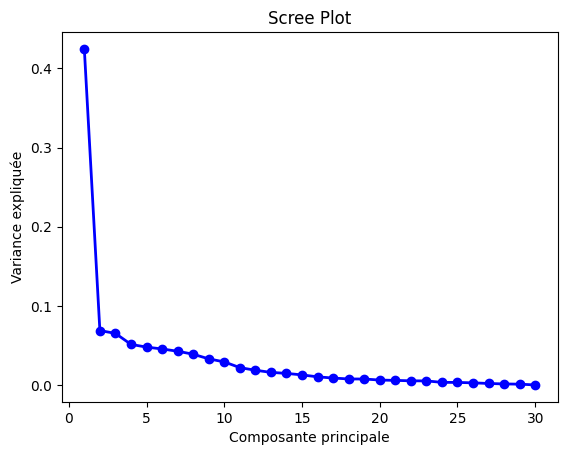

In [ ]:
# 2. Appliquer la PCA
pca = PCA()
principalComponents = pca.fit_transform(df_mise_a_l_echelle)

# 3. Obtenir le scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.show()

# Analyse du graphique d'éboulis ( scree plot ) ⚡

In [ ]:
!pip install kneed==0.8.5

The elbow is at component: 2


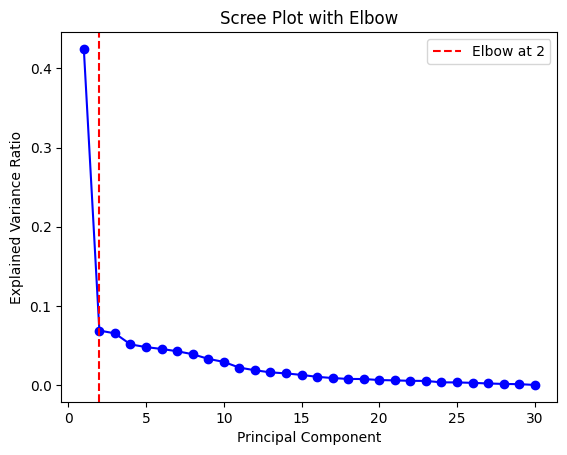

In [ ]:
variance_expliquee = pca.explained_variance_ratio_

# Detecter le coude
kl = KneeLocator(
    range(1, len(variance_expliquee) + 1),
    variance_expliquee,
    curve="convex",
    direction="decreasing"
)

# Afficher le coude
print(f"The elbow is at component: {kl.elbow}")

# Afficher le Scree plot avec le coude
plt.plot(range(1, len(variance_expliquee) + 1), variance_expliquee, 'bo-')
plt.axvline(kl.elbow, linestyle='--', color='r', label=f'Elbow at {kl.elbow}')
plt.title('Scree Plot with Elbow')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


Comme indiqué dans le scree plot ci-dessus, l'éboulis se situe à la composante 2.

Nous devons donc conserver les deux premières composantes principales, en respectant la **règle du coude**.


In [ ]:
# Créer un nouveau DataFrame avec les 2 premières composantes principales
n_composantes = 2  # Nombre de composantes principales à conserver
pca = PCA(n_components=n_composantes)
composantes_principales = pca.fit_transform(df_mise_a_l_echelle)

# Créer un nouveau DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=composantes_principales,
                                 columns=['PC1', 'PC2'],
                                 index=df_mise_a_l_echelle.index) # Conserver l'index original

À ce stade, notre jeu de données pca_df ne contient que deux variables. 📊
pca_df sera utilisée dans les prochaines étapes du projet. 🚀

# 🔍 Explorer les clusters : K-means ou DBSCAN ? 🤔

Pour choisir entre K-means et DBSCAN, on peut utiliser la méthode du **k-distance** **plot**.

Ce graphique montre la distance au k-ième voisin le plus proche pour chaque point.

👉 Si le plot présente un coude, cela indique que les données sont adaptées à l'algorithme DBSCAN plutôt qu'à K-means.

Le **coude** dans le *k-distance plot* montre une différence marquée entre les points dans les régions denses et ceux dans les régions plus isolées.

DBSCAN peut exploiter cette différence pour identifier les points dans les zones denses comme appartenant à un cluster et traiter les points éloignés comme du bruit.

Dans l'état de l'art, la valeur minimale de minPts pour un ensemble de données présentant 2 variables se situe généralement entre 3 et 10.

Plusieurs études antérieures soulignent que, pour un ensemble de données à
$\, d \,$ dimensions, la valeur de minPts peut être déterminée par la formule suivante :

$\text{minPts} = 2 \times d$

*(Sander et al., 1998)*. 📊

Cette approche repose sur le principe que le nombre minimum de points doit être proportionnel à la dimensionalité des données afin d'assurer une densité adéquate pour la détection des clusters.

 Ainsi, pour un ensemble de données à 6 dimensions, les valeurs de minPts recommandées varient entre 12 et 20.

 Cependant, pour mon étude, je vais explorer différentes valeurs de minPts dans le cadre de l'approche d'optimisation des hyperparamètres, afin de mieux adapter l'algorithme aux spécificités de mon ensemble de données.

 Il est important de noter que le choix de minPts influence directement la sensibilité et la robustesse du modèle de clustering.

NB ❗ : MinPts dans DBSCAN est équivalent à k dans le k-distance plot.

 🔍 En effet, le k-distance plot trace les distances des points à leurs k-ièmes voisins les plus proches, ce qui correspond au rôle de MinPts dans DBSCAN.

 Cette valeur détermine combien de points doivent se trouver dans le voisinage d’un point pour qu'il soit considéré comme dense.

 🌐 Ainsi, choisir MinPts revient à fixer le paramètre k utilisé dans le calcul des distances pour ce plot. 📉

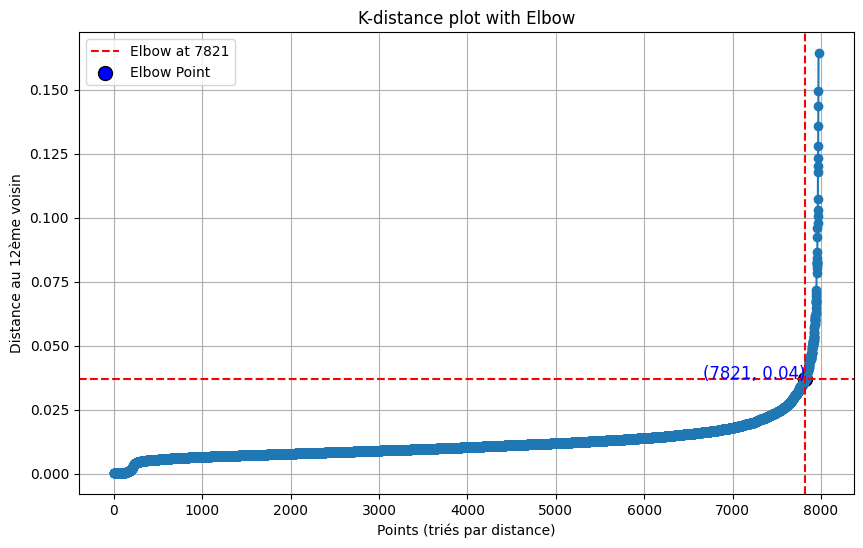

In [ ]:
# Créer un modèle NearestNeighbors
n_neighbors = 8  # Nombre de voisins
neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors_fit = neighbors.fit(pca_df)

# Obtenir les distances et les indices des voisins
distances, indices = neighbors_fit.kneighbors(pca_df)

# Trier les distances pour le k-ème voisin
k_distances = np.sort(distances[:, n_neighbors - 1], axis=0)  # Choisir la distance au 12ème voisin

# Detecter le coude
kl = KneeLocator(
    range(1, len(k_distances) + 1),
    k_distances,
    curve="convex",
    direction="increasing"
)

# Visualiser le point du coude sur le graphe obtenu
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(k_distances) + 1), k_distances, marker='o')

# Coordonnées du coude
elbow_x = kl.elbow
elbow_y = k_distances[elbow_x - 1]  # -1 car l'index commence à 0

# Traités discontinus
plt.axvline(elbow_x, linestyle='--', color='r', label=f'Elbow at {elbow_x}')
plt.axhline(elbow_y, linestyle='--', color='r')

# Cercle au point du coude
plt.scatter(elbow_x, elbow_y, color='blue', s=100, edgecolor='black', label='Elbow Point')

# Affichage des coordonnées du coude
plt.text(elbow_x, elbow_y, f'({elbow_x}, {elbow_y:.2f})', fontsize=12, ha='right', color='blue')

# Titres et labels
plt.title("K-distance plot with Elbow")
plt.xlabel("Points (triés par distance)")
plt.ylabel("Distance au 12ème voisin")
plt.legend()
plt.grid()
plt.show()


## Analyse du k-ditance plot ✅

Sur le **k-distance plot** ci-dessus, les **points avant le coude** (ceux avec des distances relativement faibles sur l'axe des ordonnées) appartiennent en général à **des clusters**.

*Ils sont dans des zones denses où la distance jusqu'au k-ième plus proche voisin est faible, ce qui signifie qu’ils sont proches d’autres points, formant ainsi un ou plusieurs clusters.*

Par contre, les **points après le coude**, où les distances augmentent soudainement, sont souvent des **outliers** ou des points situés en bordure des clusters.

Ces points ont des distances plus grandes par rapport à leur k-ième plus proche voisin, indiquant qu’ils se trouvent dans des régions de faible densité ou qu’ils sont isolés. *texte en italique*

En résumé :

Avant le coude 👉 Points appartenant à des clusters, dans des zones de haute densité.

Après le coude 👉 Points qui ne font pas partie de clusters (outliers ou points isolés), dans des zones de faible densité.


💯 Le **coude visible** dans le plot montre que **DBSCAN pourrait être un bon choix** pour ce dataset.

Il permettrait de bien capturer les clusters denses avant le coude et de traiter les points après le coude comme du bruit ou des outliers, ce que K-means ne ferait pas aussi efficacement.

# DBSCAN Algorithm


## Choix des hyperparamètres 📊
Pour optimiser notre modèle, nous avons pris en compte deux hyperparamètres essentiels.

1. minPts : Nous avons choisi une valeur de **minPts** égale à **8**.

  Cette approche s'aligne sur les recommandations fournies dans l'article de Ester et al. (1996) concernant l'algorithme DBSCAN.

2. epsilon (ε) : La valeur d'epsilon est souvent déterminée en analysant le k-distance plot. Plus précisément, nous sélectionnons epsilon comme l'ordonnée du point du coude observé sur le graphique.

 Dans notre cas, **epsilon est égal à 0.01**.

En combinant ces paramètres, nous visons à améliorer l'efficacité de notre clustering. 🚀



In [ ]:
# Instancier le modèle DBSCAN
dbscan = DBSCAN(eps=0.04, min_samples=20)

# Ajuster le modèle aux données
clusters = dbscan.fit_predict(pca_df)

# Ajouter les étiquettes de cluster au DataFrame
pca_df['cluster'] = clusters

# Afficher le nombre de clusters trouvés
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclure le cluster -1 (bruit)
print(f"Nombre de clusters trouvés: {n_clusters}")

# Afficher le nombre de points dans chaque cluster
from collections import Counter
cluster_counts = Counter(clusters)
print(f"Nombre de points dans chaque cluster:\n{cluster_counts}")

Nombre de clusters trouvés: 2
Nombre de points dans chaque cluster:
Counter({0: 3877, 1: 3779, -1: 316})


## Attribution des labels dans DBSCAN 🎯
Si un point appartient à un cluster, DBSCAN lui attribue un label correspondant à un *numéro de cluster*, généralement un *entier ≥ 0*.

Par exemple, si DBSCAN détecte deux clusters, les points appartenant au **premier cluster** pourraient recevoir le **label 0**, et ceux du **deuxième cluster** le **label 1**, et ainsi de suite.

Les points qui sont considérés comme du **bruit** ou des outliers (des points qui ne sont pas suffisamment proches d'autres points pour appartenir à un cluster) se verront attribuer le **label -1**.

Dans notre cas, les 316 outliers identifiés pourraient être des cas suspects nécessitant une attention particulière. 🔍

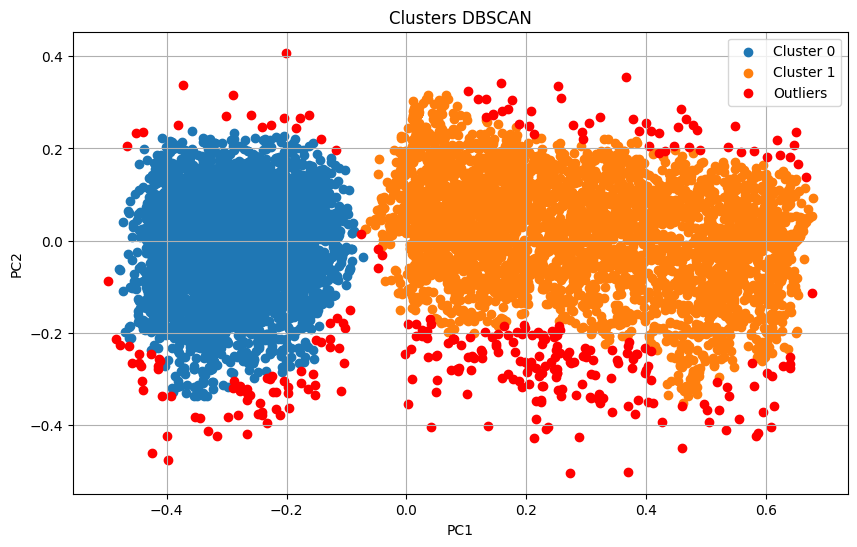

In [ ]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))

# Points des clusters
for cluster in pca_df['cluster'].unique():
    if cluster != -1:  # Exclure les outliers
        plt.scatter(pca_df.loc[pca_df['cluster'] == cluster, 'PC1'],
                    pca_df.loc[pca_df['cluster'] == cluster, 'PC2'],
                    label=f'Cluster {cluster}')

# Points des outliers en rouge
plt.scatter(pca_df.loc[pca_df['cluster'] == -1, 'PC1'],
            pca_df.loc[pca_df['cluster'] == -1, 'PC2'],
            color='red', label='Outliers')

plt.title('Clusters DBSCAN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.legend()
plt.show()

## 🔍 Analyse des clusters avec DBSCAN
Clusters identifiés : 🎯 Avec DBSCAN, nous avons pu détecter deux clusters distincts :

1. Cluster 0 (points en bleu)

2. Cluster 1 (points en orange)

3. Outliers (anomalies) : 🚨 Les points en rouge représentent des outliers, c'est-à-dire des points de données qui ne correspondent à aucun cluster en raison de leur faible densité ou de leur éloignement.

**DBSCAN a efficacement isolé ces anomalies en plus de la segmentation en clusters.**

## 🛠️ Pourquoi Isolation Forest est plus adapté ici ?
Même si **DBSCAN** est performant pour identifier **à la fois** des **clusters** et des **outliers**, dans le cadre de notre projet, l'**objectif principal** est l'identification des **outliers**.

 C'est là qu'**Isolation Forest** 🌲 devient un choix **plus pertinent** :

Isolation Forest n'a pas pour vocation de créer plusieurs clusters, mais de détecter efficacement les anomalies (outliers) en isolant progressivement chaque point.

Il traite l'ensemble des données comme un seul groupe et met l'accent sur l'identification des points rares ou atypiques, ce qui correspond parfaitement à notre besoin d'identifier les outliers sans se soucier des clusters.

## Isolation Forest 🌲
👉 Nous allons donc appliquer **Isolation Forest**, un algorithme qui fonctionne en isolant chaque point de données en construisant des arbres de décision aléatoires.

 Les points isolés rapidement sont identifiés comme des outliers, ce qui en fait un outil puissant pour la détection d'anomalies dans les grands ensembles de données.



In [ ]:
# Créer un modèle IsolationForest
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Ajuster le modèle à vos données
isolation_forest.fit(pca_df[['PC1', 'PC2']])  # Utilisation des composantes principales

# Obtenir les scores d'anomalie
anomaly_scores = isolation_forest.decision_function(pca_df[['PC1', 'PC2']])

# Prédire les valeurs aberrantes (-1) et les valeurs normales (1)
outlier_predictions = isolation_forest.predict(pca_df[['PC1', 'PC2']])

# Ajouter les prédictions à votre DataFrame
pca_df['isolation_forest_outlier'] = outlier_predictions

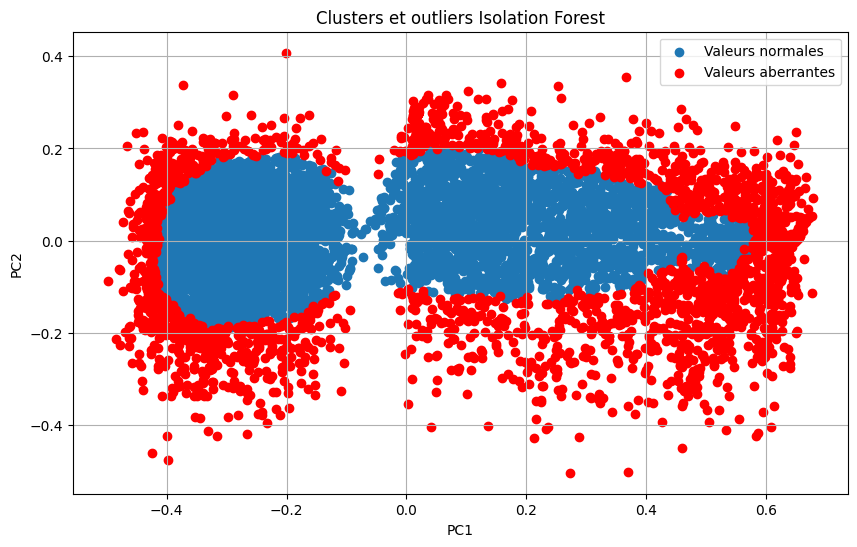

In [ ]:
# Visualiser les clusters et les outliers
plt.figure(figsize=(10, 6))

# Points des clusters (valeurs normales)
plt.scatter(pca_df.loc[pca_df['isolation_forest_outlier'] == 1, 'PC1'],
            pca_df.loc[pca_df['isolation_forest_outlier'] == 1, 'PC2'],
            label='Valeurs normales')

# Points des outliers en rouge
plt.scatter(pca_df.loc[pca_df['isolation_forest_outlier'] == -1, 'PC1'],
            pca_df.loc[pca_df['isolation_forest_outlier'] == -1, 'PC2'],
            color='red', label='Valeurs aberrantes')

plt.title('Clusters et outliers Isolation Forest')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()


## Identification des Outliers avec Isolation Forest
Comme illustré sur le graphique ci-dessus, l'algorithme Isolation Forest se révèle efficace pour identifier les outliers (en rouge).

 Contrairement à DBSCAN qui segmenté les données en clusters, **cet algorithme distingue les points aberrants sans diviser les groupes principaux**.

 En se concentrant sur l'isolement des observations anormales, il facilite la détection des anomalies tout en préservant l'intégrité des clusters. Cette capacité constitue un atout majeur pour l'analyse des données 📊✨.


# ✨ Résumé :


*   **DBSCAN** est un algorithme robuste qui permet de détecter des clusters de forme arbitraire tout en isolant des outliers, mais il reste moins adapté pour un objectif strictement axé sur l'identification des anomalies.
*   **Isolation Forest**, quant à lui, est spécifiquement conçu pour isoler et identifier les outliers, ce qui en fait l'algorithme le plus approprié dans ce projet.

En conclusion, bien que DBSCAN soit performant, l'approche d'Isolation Forest s'aligne mieux avec **l'objectif principal du projet : détecter des anomalies sans chercher à identifier plusieurs clusters**.